In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
## uploading dataset for using in google colab (not necessary for jupyter nb)
from google.colab import files
uploaded = files.upload()

Saving economic_index.csv to economic_index.csv


In [6]:
# load the dataset
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
# data cleaning (drop unnecessary columns)
df.drop(['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# check data correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


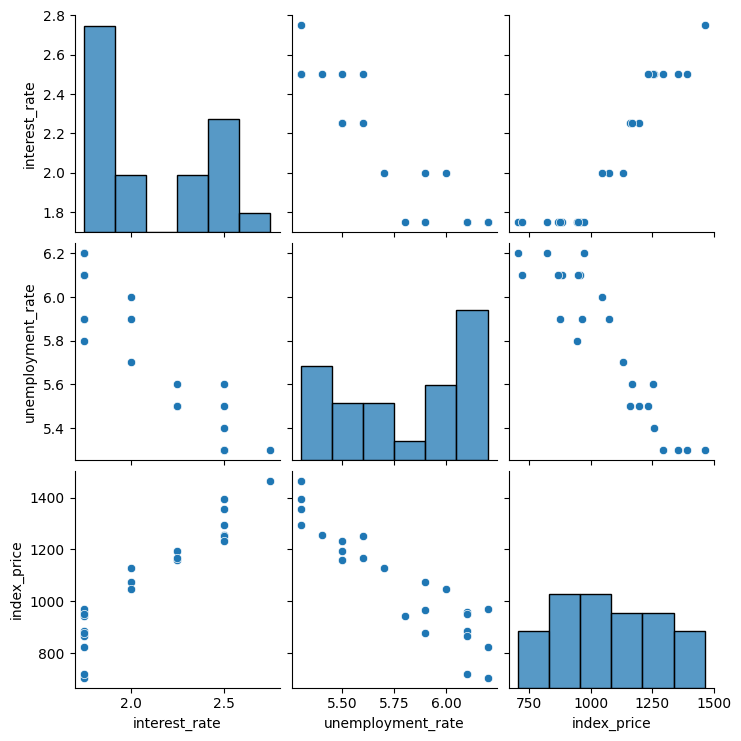

In [9]:
#visualize the dataset
sns.pairplot(df)

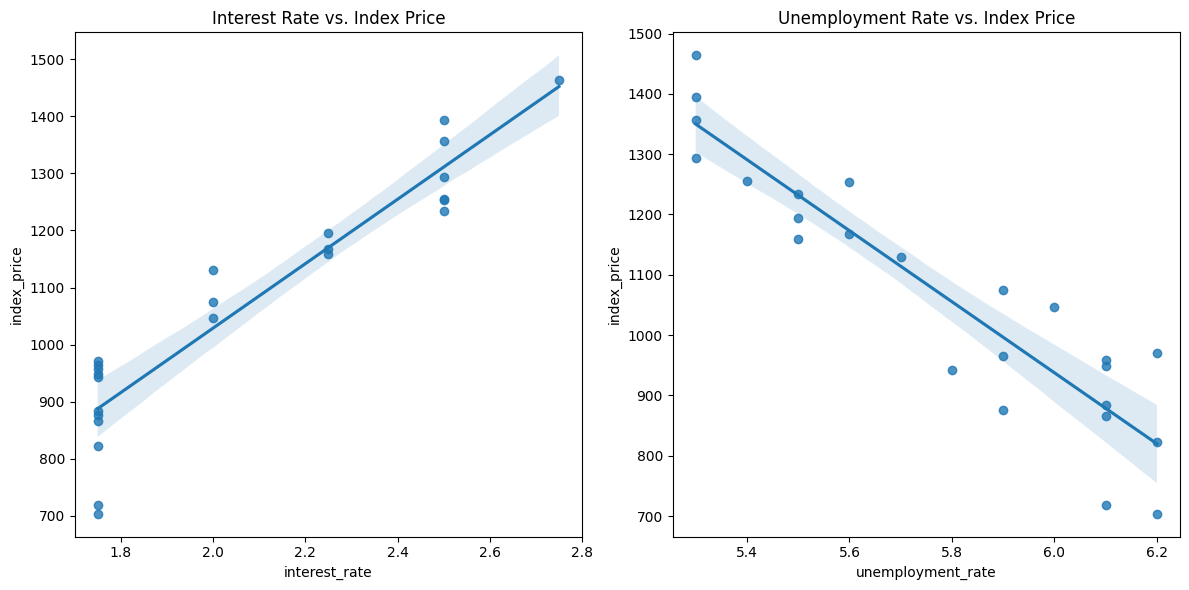

In [13]:
# regression plot by seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=df['interest_rate'], y=df['index_price'])
plt.title('Interest Rate vs. Index Price')

plt.subplot(1, 2, 2)
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])
plt.title('Unemployment Rate vs. Index Price')

plt.tight_layout()
plt.show()

In [15]:
X=df[['interest_rate','unemployment_rate']] #independent features (2d/dataframe)
y=df['index_price'] #dependent features (1d/series)

In [32]:
# train test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
# cross validation
validation_score=cross_val_score(model,X_train,y_train,scoring='r2', cv=5)
print(validation_score)
print(np.mean(validation_score))

[0.96373611 0.68310264 0.80679599 0.79355092 0.96849166]
0.843135465080149


In [17]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
# Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
# slope and intercept
print('Slope:',model.coef_)
print('Intercept:',model.intercept_)

Slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


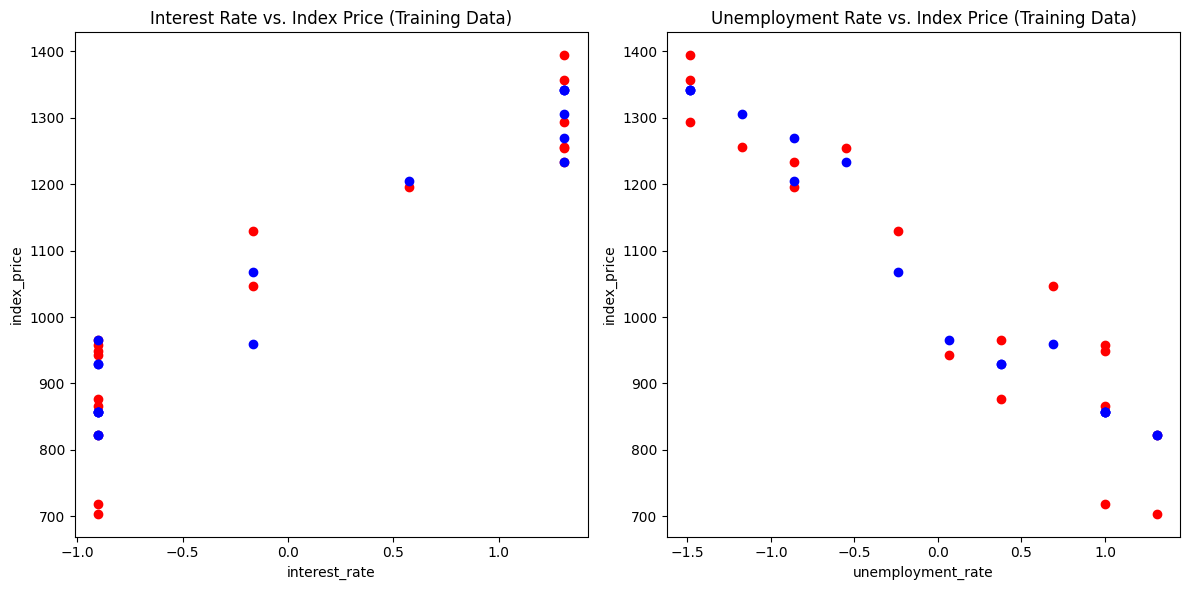

In [20]:
# plot for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], y_train, color='red')
plt.plot(X_train[:, 0], model.predict(X_train), 'o', color='blue') # Plotting predicted points

plt.xlabel('interest_rate')
plt.ylabel('index_price')
plt.title('Interest Rate vs. Index Price (Training Data)')

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 1], y_train, color='red')
plt.plot(X_train[:, 1], model.predict(X_train), 'o', color='blue') # Plotting predicted points

plt.xlabel('unemployment_rate')
plt.ylabel('index_price')
plt.title('Unemployment Rate vs. Index Price (Training Data)')

plt.tight_layout()
plt.show()

In [21]:
y_pred=model.predict(X_test)

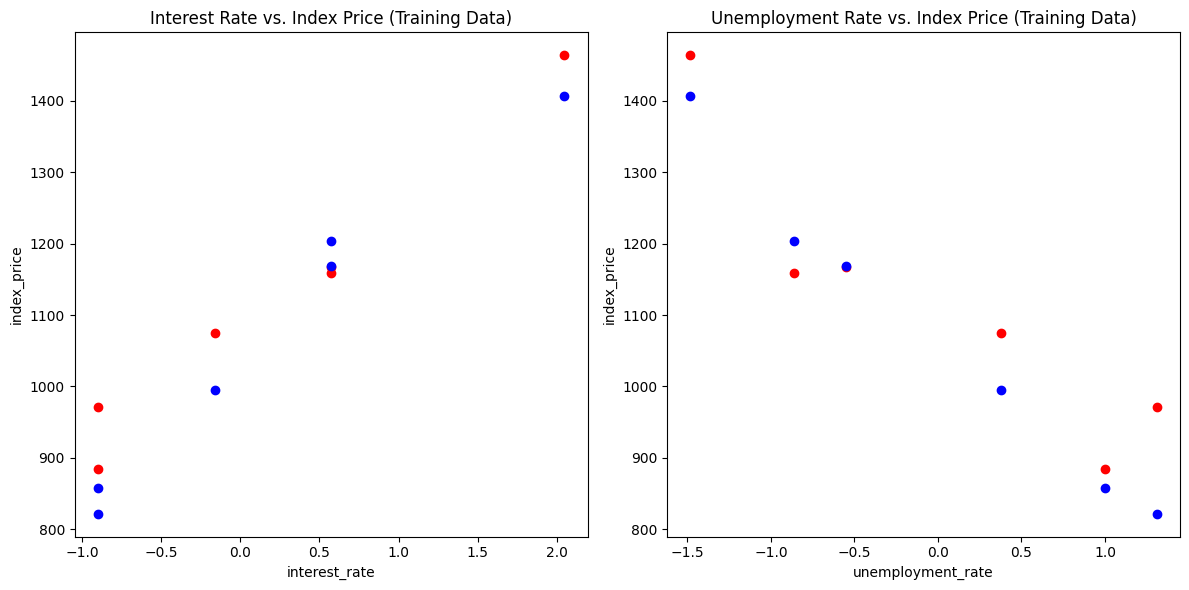

In [22]:
# plot for testing data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='red')
plt.plot(X_test[:, 0], y_pred, 'o', color='blue') # Plotting predicted points

plt.xlabel('interest_rate')
plt.ylabel('index_price')
plt.title('Interest Rate vs. Index Price (Training Data)')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, color='red')
plt.plot(X_test[:, 1], y_pred, 'o', color='blue') # Plotting predicted points

plt.xlabel('unemployment_rate')
plt.ylabel('index_price')
plt.title('Unemployment Rate vs. Index Price (Training Data)')

plt.tight_layout()
plt.show()

In [30]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

#adjusted r2 score
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("MAE:",mae,"\nMSE:",mse,"\nRMSE:",rmse,"\nr2 score:",r2,"\nAdjusted R2 Score:",adj_r2)

MAE: 59.935781523235484 
MSE: 5793.762887712569 
RMSE: 76.11677139574805 
r2 score: 0.8278978091457145 
Adjusted R2 Score: 0.7131630152428576


In [36]:
# OLS Regression
import statsmodels.api as sm
OLS_Model=sm.OLS(y_train,X_train).fit()

#summary
print(OLS_Model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):                    7.46e-19
Time:                        15:02:58   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


# SOME ASSUMPTIONS TO KEEP IN MIND WHILE PERFORMING LINEAR REGRESSION

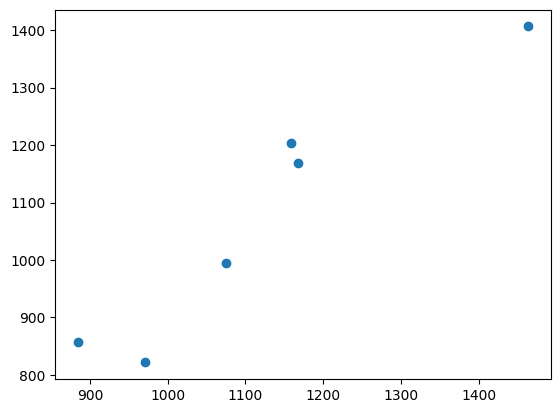

In [37]:
# check linearity
plt.scatter(y_test,y_pred)

In [39]:
# Errors
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


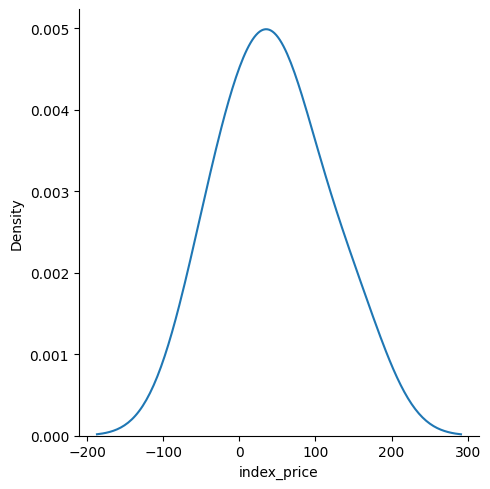

In [40]:
# The Residuals Plot should have a normal distribution
sns.displot(residuals,kind='kde')

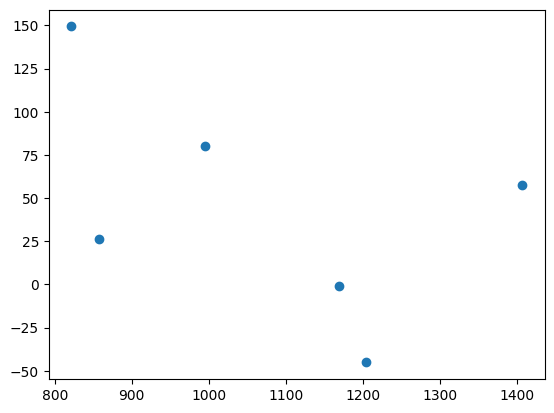

In [41]:
# scatter plot wrt prediction and residuals should be dispered/varying
plt.scatter(y_pred,residuals)